**Disusun Oleh :** 

Ulfah Nur Oktaviana

**Pembimbing:** 

Galih Wasis Wicaksono S.Kom, M.Cs

# **SISTEM INFERENSI FUZZY METODE TSUKAMOTO**
**CONTOH KASUS : MESIN CUCI OTOMATIS**



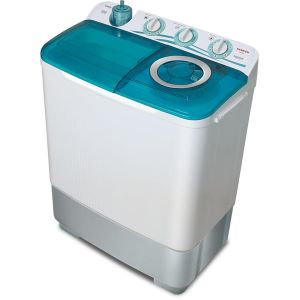

Sebuah pabrik mesin cuci akan membuat sebuah **mesin cuci otomatis berbasis Fuzzy** yang dapat mengatur **kecepatan putar** mesin berdasarkan **banyak pakaian** dan **tingkat kekotoran**. mesin cuci telah dilengkapi dengan sensor yang dapat mendeteksi banyaknya pakaian dan tingkat kekotoran pakaian. spesifikasinya sebagai berikut:

1. **Kecepatan Putar** Mesin dalam pencucian minimal 500 rpm (lambat) dan maksimal 1200 rpm (cepat)
2. **Banyaknya Pakaian** dinyatakan dengan nilai 0-100 yang mana nilai <= 40 termasuk sedikit dan >= 80 termasuk banyak.
3. **Tingkat Kekotoran** dinyatakan dengan nilai 0-100 yang mana nilai 0-40 adalah rendah 50 adalah sedang, dan 60-100 adalah tinggi.

# 1. Fuzzifikasi 


---


"Merupakan Proses merubah input sistem yang mempunyai nilai Tegas (crips) menjadi variabel linguistik (fuzzy) menggunakan fungsi keanggotaan yang disimpan dalam basis pengtahuan"


---



In [ ]:
j_pakaian = int(input("masukkan banyak pakian ="))
t_kekotoran = int(input("Masukkan tingkat kekotoran ="))

masukkan banyak pakian =50
Masukkan tingkat kekotoran =58


## Fuzzifikasi Jumlah Pakaian

"Banyak pakaian dinyatakan dengan nilai 0-100 yang mana nilai <= 40 termasuk sedikit dan >=80 termasuk banyak"

In [ ]:
if j_pakaian <= 40: 
  myu_sedikit = 1
  myu_banyak = 0
if j_pakaian >= 40 and j_pakaian <= 80 :
  myu_sedikit = (80 - j_pakaian)/(80 - 40)
  myu_banyak = (j_pakaian - 40)/(80 - 40)
if j_pakaian >= 80 :
  myu_sedikit = 0
  myu_banyak = 1

In [ ]:
print("Maka jumlah pakaian dalam variabel linguistik, derajat keanggotaan adalah")
print("derajat keanggotaan pakaian jumlah sedikit : ", myu_sedikit)
print("derajat keanggotaan pakian jumlah banyak : ", myu_banyak)

Maka jumlah pakaian dalam variabel linguistik, derajat keanggotaan adalah
derajat keanggotaan pakaian jumlah sedikit :  0.75
derajat keanggotaan pakian jumlah banyak :  0.25


## Fuzzifikasi Tingkat Kekotoran

Tingkat kekotoran dinyatakan dengan nilai 0-100 yang mana nilai 0-40 adalah rendah. 50 adalah sedang, dan 60-100 adalah tinggi. 

In [ ]:
if t_kekotoran <= 40: 
  myu_rendah = 1
  myu_sedang = 0 
  myu_tinggi = 0
if t_kekotoran >=40 and t_kekotoran <=50 :
  myu_rendah = (50 - t_kekotoran)/(50-40)
  myu_sedang = (t_kekotoran - 40)/(50-40)
  myu_tinggi = 0
if t_kekotoran >= 50 and t_kekotoran <= 60: 
  myu_rendah = 0 
  myu_sedang = (60 - t_kekotoran)/(60-50)
  myu_tinggi = (t_kekotoran - 50)/ (60-50)
if t_kekotoran >= 60: 
  myu_rendah = 0
  myu_sedang = 0
  myu_tinggi = 1

In [ ]:
print("Maka Tingkat Kekotoran dalam variabel linguistik, derajat keanggotaan adalah")
print("derajat keanggotaan kekotoran tingkat rendah : ", myu_rendah)
print("derajat keanggotaan kekotoran tingkat sedang : ", myu_sedang)
print("derajat keanggotaan kekotoran tingkat tinggi : ", myu_tinggi)

Maka Tingkat Kekotoran dalam variabel linguistik, derajat keanggotaan adalah
derajat keanggotaan kekotoran tingkat rendah :  0
derajat keanggotaan kekotoran tingkat sedang :  0.2
derajat keanggotaan kekotoran tingkat tinggi :  0.8


# 2. SISTEM INFERENSI


---


"**Inferensi** merupakan proses mengubah input fuzzy menjaid output fuzzy dengan cara mengikuti **aturan-aturan (if-then)** yang telah ditetapkan pada Basis pengetahuan Fuzzy"



---



**Aturan(Rule)**

1. [R1] Jika pakaian **sedikit** dan kekotoran **rendah**, maka putaran **lambat**
2. [R2] Jika pakaian **sedikit** dan kekotoran **sedang**, maka putaran **lambat**
3. [R3] Jika pakaian **sedikit** dan kekotoran **tinggi**, maka putaran **cepat**
4. [R4] Jika pakaian **banyak** dan kekotoran **rendah**, maka putaran **lambat**
5. [R5] Jika pakaian **banyak** dan kekotoran **sedang**, maka putaran **cepat**
6. [R6] Jika pakaian **banyak** dan kekotoran **tinggi**, maka putaran **cepat**

In [ ]:

def fungsiinferensilambat(derajat_jml_pakaian, derajat_t_kekotoran):
      alfa_predikat = min(derajat_jml_pakaian, derajat_t_kekotoran)
      result =  1200 - (alfa_predikat * 700)
      return result, alfa_predikat


def fungsiinferensicepat(derajat_jml_pakaian, derajat_t_kekotoran):
      alfa_predikat = min(derajat_jml_pakaian, derajat_t_kekotoran)
      result =  (alfa_predikat * 700) + 500
      return result, alfa_predikat


In [ ]:
R1 = fungsiinferensilambat(myu_sedikit, myu_rendah)
R2 = fungsiinferensilambat(myu_sedikit, myu_sedang)
R4 = fungsiinferensilambat(myu_banyak, myu_rendah)

R3 = fungsiinferensicepat(myu_sedikit, myu_tinggi)
R5 = fungsiinferensicepat(myu_banyak, myu_sedang)
R6 = fungsiinferensicepat(myu_banyak, myu_tinggi)

In [ ]:
print(R1, R2, R3, R4, R5, R6)

(1200, 0) (1060.0, 0.2) (1025.0, 0.75) (1200, 0) (640.0, 0.2) (675.0, 0.25)


# 3. Defuzzifikasi


---

**Defuzzifikasi** merpakan proses merubah hasil dari tahap inferensi menjadi output yang bernilai tegas (crips) menggunakan fungsi keanggotaan yang telah ditetapkan.


---




**Metode Average (rata-rata)**

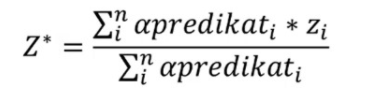

In [ ]:
pembilang = ((R1[0]*R1[1])+(R2[0]*R2[1])+(R3[0]*R3[1])+(R4[0]*R4[1])+(R5[0]*R5[1])+(R6[0]*R6[1]))
pembagi = (R1[1]+R2[1]+R3[1]+R4[1]+R5[1]+R6[1])

In [ ]:
final_result = pembilang/pembagi

In [ ]:
print("Jika banyak pakaian bernilai 50 dan tingkat kekotoran bernilai 58, maka kecepatan putaran mesin cuci adalah :",final_result, "rpm")

Jika banyak pakaian bernilai 50 dan tingkat kekotoran bernilai 58, maka kecepatan putaran mesin cuci adalah : 912.5000000000001 rpm
